lgb:
  params:
    objective: binary
    metric: auc
    verbose: -1
    boosting_type: gbdt
    learning_rate: 0.01
    max_depth: 5
    num_leaves: 31
    min_data_in_leaf: 50
    bagging_fraction: 0.8
    bagging_freq: 1
    feature_fraction: 0.8
    lambda_l1: 0
    lambda_l2: 1
    seed: 42
  early_stopping_rounds: 100
  log_evaluation: 100
  num_boost_round: 10000000
bert:
  params:
    model_path: microsoft/deberta-v3-large
    metric: auc
    target_col_class_num: 2
    max_length: 192
    fp16: true
    learning_rate: 2.0e-05
    epochs: 1
    per_device_train_batch_size: 4
    per_device_eval_batch_size: 16
    steps: 100
    lr_scheduler_type: linear
    weight_decay: 0.01
exp_number: '010'
run_name: base
data:
  data_root: ../../data
  results_root: ../../results
  train_path: ../../data/train.csv
  clothing_path: ../../data/clothing_master.csv
  test_path: ../../data/test.csv
  sample_submission_path: ../../data/sample_submission.csv
  results_dir: ../../results/010/base
s

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2001 [00:00<?, ? examples/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Step,Training Loss,Validation Loss,Auc
100,1.159700,0.958467,0.767432
200,0.959000,0.877774,0.731814
300,0.869100,0.756851,0.937346
400,0.824700,0.619525,0.942659
500,0.727900,0.601553,0.946584


Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2001 [00:00<?, ? examples/s]

Step,Training Loss,Validation Loss,Auc
100,0.890200,0.512724,0.937249
200,0.616300,0.402324,0.927074
300,0.535800,0.400970,0.934719
400,0.521100,0.391080,0.938129
500,0.467800,0.355857,0.939530


Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Step,Training Loss,Validation Loss,Auc
100,0.940900,0.624315,0.815596
200,0.616300,0.486528,0.893207
300,0.537100,0.404773,0.919626
400,0.482900,0.393066,0.927421
500,0.479300,0.387357,0.905102


Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/8001 [00:00<?, ? examples/s]

Map:   0%|          | 0/1999 [00:00<?, ? examples/s]

Step,Training Loss,Validation Loss,Auc
100,0.885700,0.593167,0.959780
200,0.630700,0.591063,0.925737
300,0.563300,0.397220,0.955806
400,0.517100,0.378744,0.925480
500,0.473200,0.359710,0.937344


Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/8001 [00:00<?, ? examples/s]

Map:   0%|          | 0/1999 [00:00<?, ? examples/s]

Step,Training Loss,Validation Loss,Auc
100,0.929000,0.534726,0.939303
200,0.599700,0.517754,0.884900
300,0.557900,0.407145,0.949472
400,0.508800,0.384388,0.931641
500,0.457800,0.388011,0.934202


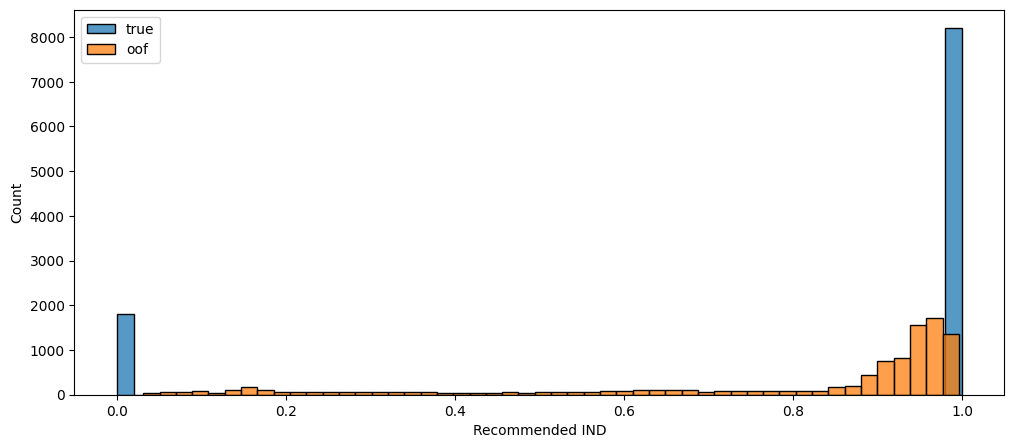

Map:   0%|          | 0/11155 [00:00<?, ? examples/s]

Map:   0%|          | 0/11155 [00:00<?, ? examples/s]

Map:   0%|          | 0/11155 [00:00<?, ? examples/s]

Map:   0%|          | 0/11155 [00:00<?, ? examples/s]

,target
0,0.918439
1,0.362283
2,0.951344
3,0.199755
4,0.947680


In [1]:
import time
import warnings
from pathlib import Path
import numpy as np
import pandas as pd
import torch
from datasets import Dataset
from hydra import compose, initialize
from omegaconf import OmegaConf
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    DataCollatorWithPadding,
    Trainer,
    TrainingArguments,
    TrainerCallback,
    TrainerState,
    TrainerControl
)

warnings.filterwarnings("ignore")
with initialize(config_path="config", version_base=None):
    cfg = compose(config_name="config")
    cfg.exp_number = Path().resolve().name

print(OmegaConf.to_yaml(cfg, resolve=True))

# seed_everything(cfg.seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


import numpy as np
import pandas as pd
import torch
from datasets import Dataset
from hydra import compose, initialize
from omegaconf import OmegaConf
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from src.seed import seed_everything
from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    DataCollatorWithPadding,
    Trainer,
    TrainingArguments,
)

warnings.filterwarnings("ignore")
with initialize(config_path="config", version_base=None):
    cfg = compose(config_name="config")
    cfg.exp_number = Path().resolve().name

print(OmegaConf.to_yaml(cfg, resolve=True))

seed_everything(cfg.seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



### Import
debug = False

train_df = pd.read_csv(cfg.data.train_path)
clothing_df = pd.read_csv(cfg.data.clothing_path)
test_df = pd.read_csv(cfg.data.test_path)

if debug:
    train_df = train_df.sample(500)

def preprocess(df):
    df["prompt"] =  "The cloth id to be reviewed is " + df["Clothing ID"].map(str) + " [SEP] " + "TITLE: " + df["Title"].fillna("none") + " [SEP] " + "REVIEW: " + df["Review Text"].fillna("none")
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)
train_df["labels"] = train_df[cfg.target].astype(np.int8)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=cfg.seed)

def compute_metrics(p):
    preds, labels = p
    preds = torch.softmax(torch.tensor(preds), dim = 1).numpy()
    score = roc_auc_score(labels, preds[:, 1])
    return {'auc': score}

cfg.run_name = time.strftime("%Y%m%d_%H%M%S")
Path(cfg.data.results_dir).mkdir(exist_ok=True, parents=True)

y_train = train_df[cfg.target]
oof = np.zeros(len(train_df))

train_df['fold'] = 99
train_df['index'] = train_df.index
train_df_0 = train_df[train_df[cfg.target] == 0].reset_index(drop=True)
train_df_1 = train_df[train_df[cfg.target] == 1].reset_index(drop=True)

for fold, (_, val_id) in enumerate(kf.split(train_df_0, train_df_0['Clothing ID'])):
    train_df_0.loc[val_id, 'fold'] = fold
for fold, (_, val_id) in enumerate(kf.split(train_df_1, train_df_1['Clothing ID'])):
    train_df_1.loc[val_id, 'fold'] = fold

train_df = pd.concat([train_df_0, train_df_1]).set_index('index').sort_index()

# Meta-Pseudo-Labels を実装する部分
class MetaPseudoLabelTrainer(Trainer):
    def __init__(self, teacher_model, **kwargs):
        super().__init__(**kwargs)
        self.teacher_model = teacher_model.to(kwargs['args'].device)  # 教師モデルを適切なデバイスに移動

    def compute_loss(self, model, inputs, return_outputs=False):
        # デバイスに移動
        inputs = {k: v.to(self.args.device) for k, v in inputs.items()}

        # 生徒モデルの出力
        student_outputs = model(**inputs)
        student_loss = student_outputs.loss

        # 教師モデルの出力（ラベルなしデータに対して擬似ラベルを生成）
        with torch.no_grad():
            teacher_outputs = self.teacher_model(**inputs)
            pseudo_labels = torch.argmax(teacher_outputs.logits, dim=1).to(self.args.device)

        # 擬似ラベルで生徒モデルを再トレーニング
        student_outputs_with_pseudo = model(input_ids=inputs['input_ids'], labels=pseudo_labels)
        pseudo_loss = student_outputs_with_pseudo.loss

        # 学習の際には生徒モデルの元の損失と擬似ラベルによる損失の両方を使う
        loss = student_loss + pseudo_loss

        return (loss, student_outputs) if return_outputs else loss


# 各foldで学習を行う
for fold in range(5):
    valid_index = train_df[train_df['fold'] == fold].index

    ds_train = Dataset.from_pandas(train_df[train_df['fold'] != fold][['prompt', 'labels']].copy())
    ds_eval = Dataset.from_pandas(train_df[train_df['fold'] == fold][['prompt', 'labels']].copy())

    tokenizer = AutoTokenizer.from_pretrained(cfg.bert.params.model_path)
    config = AutoConfig.from_pretrained(cfg.bert.params.model_path)
    teacher_model = AutoModelForSequenceClassification.from_pretrained(cfg.bert.params.model_path, config=config)
    student_model = AutoModelForSequenceClassification.from_pretrained(cfg.bert.params.model_path, config=config)

    def tokenize(sample):
        return tokenizer(sample['prompt'], max_length=cfg.bert.params.max_length, truncation=True)

    ds_train = ds_train.map(tokenize).remove_columns(['prompt', 'index'])
    ds_eval = ds_eval.map(tokenize).remove_columns(['prompt', 'index'])

    output_dir = f"{cfg.data.results_dir}/fold{fold}"

    train_args = TrainingArguments(
        output_dir=output_dir,
        fp16=cfg.bert.params.fp16,
        learning_rate=cfg.bert.params.learning_rate,
        num_train_epochs=cfg.bert.params.epochs,
        per_device_train_batch_size=cfg.bert.params.per_device_train_batch_size,
        per_device_eval_batch_size=cfg.bert.params.per_device_eval_batch_size,
        gradient_accumulation_steps=4,
        report_to="none",
        evaluation_strategy="steps",
        do_eval=True,
        eval_steps=cfg.bert.params.steps,
        save_total_limit=1,
        save_strategy="steps",
        save_steps=cfg.bert.params.steps,
        logging_steps=cfg.bert.params.steps,
        load_best_model_at_end=True,
        lr_scheduler_type=cfg.bert.params.lr_scheduler_type,
        metric_for_best_model=cfg.bert.params.metric,
        greater_is_better=True,
        warmup_ratio=0.1,
        weight_decay=cfg.bert.params.weight_decay,
        save_safetensors=True,
        seed=cfg.seed,
        data_seed=cfg.seed,
    )

    # Meta-Pseudo-Label Trainerのインスタンスを作成
    trainer = MetaPseudoLabelTrainer(
        teacher_model=teacher_model,
        model=student_model,
        args=train_args,
        train_dataset=ds_train,
        eval_dataset=ds_eval,
        data_collator=DataCollatorWithPadding(tokenizer),
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    trainer.train()

    final_output_dir = f"{cfg.data.results_dir}/fold{fold}/final"
    trainer.save_model(final_output_dir)
    tokenizer.save_pretrained(final_output_dir)

    pred = torch.softmax(torch.tensor(trainer.predict(ds_eval).predictions), dim=1).numpy()
    oof[valid_index] = pred[:, 1]

### oof
import seaborn as sns
from matplotlib import pyplot as plt

oof_df = pd.DataFrame({"oof": oof})
oof_df.to_csv(f"{cfg.data.results_dir}/oof.csv", index=False)

best_score = roc_auc_score(y_train, oof)
with open(f"{cfg.data.results_dir}/log.txt", "w") as log_file:
    log_file.write("====== CV Score ======\n")
    log_file.write(f"best_score: {best_score}\n")
    log_file.write("\n====== params ======\n")
    log_file.write(OmegaConf.to_yaml(cfg, resolve=True))

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(y_train, bins=50)
sns.histplot(oof, bins=50)
plt.legend(["true", "oof"])
plt.show()
fig.savefig(f"{cfg.data.results_dir}/oof_hist.png")

### Submission
def tokenize(sample):
    return tokenizer(sample['prompt'], max_length=cfg.bert.params.max_length, truncation=True)

preds = []
for i in range(1, 5):
    results_dir = f"{cfg.data.results_dir}/fold{i}/final"
    tokenizer = AutoTokenizer.from_pretrained(results_dir)
    model = AutoModelForSequenceClassification.from_pretrained(results_dir)

    ds_test = Dataset.from_pandas(test_df[['prompt']].copy())
    ds_test = ds_test.map(tokenize).remove_columns(['prompt'])

    test_args = TrainingArguments(
        output_dir=cfg.data.results_dir,
        per_device_eval_batch_size=cfg.bert.params.per_device_eval_batch_size,
        do_predict=True,
        dataloader_drop_last=False,
    )
    trainer = Trainer(
        model=model,
        args=test_args,
        data_collator=DataCollatorWithPadding(tokenizer),
        tokenizer=tokenizer,
    )
    predictions = torch.softmax(torch.tensor(trainer.predict(ds_test).predictions), dim=1).numpy()
    preds.append(predictions[:, 1])

pred = np.mean(preds, axis=0)

# 提出用ファイル作成
sub_df = pd.read_csv(cfg.data.sample_submission_path)
sub_df["target"] = pred
sub_df.to_csv(f"{cfg.data.results_dir}/{cfg.run_name}_submission.csv", index=False)
sub_df.head()
